Data fields:
ID, an ID for this instance.
Area - (A), The area of a bean zone and the number of pixels within its boundaries.
Perimeter - (P), Bean circumference is defined as the length of its border.
MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
AspectRatio - (K), Defines the relationship between L and l :  𝐾=𝐿𝑙

Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area:  𝐸𝑑=4𝐴𝜋‾‾‾√

Extent - (Ex), The ratio of the pixels in the bounding box to the bean area  𝐸𝑥=𝐴𝐴𝐵
  Where  𝐴𝐵=
  Area of bounding rectangle.
Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans:  𝑆=𝐴𝐶

Roundness - (R), Calculated with the following formula:  𝑅=4𝜋𝐴𝑃2

Compactness - (CO), Measures the roundness of an object:  𝐶𝑂=𝐸𝑑𝐿

ShapeFactor1 -  (𝑆𝐹1)
  Calculated with the following formula:  𝑆𝐹1=𝐿𝐴

ShapeFactor2 -  (𝑆𝐹2)
  Calculated with the following formula:  𝑆𝐹2=𝑙𝐴

ShapeFactor3 -  (𝑆𝐹3)
  Calculated with the following formula:  𝑆𝐹3=𝐴𝐿2∗𝐿2∗𝜋

ShapeFactor4 -  (𝑆𝐹4)
  Calculated with the following formula:  𝑆𝐹4=𝐴𝐿2∗𝑙2∗𝜋

y, the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

# Libraries & Data Import

In [ ]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.io import arff
from zipfile import ZipFile
from io import BytesIO
import requests
from scipy import stats
from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, recall_score, precision_score,mean_squared_error, accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#setting the view change
pd.set_option('display.max_columns', 500)

#loading the data set from the web directly
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"

with ZipFile(BytesIO(requests.get(url).content), "r") as drybeansdata:

    with drybeansdata.open("DryBeanDataset/Dry_Bean_Dataset.xlsx", "r") as d:
        dfd = pd.read_excel(d)

dfd.head()

#dfd is the whole dataset

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

# Data Exploration
- We will explore the data that we loaded from the UCI website

In [ ]:
#shape of the data and info on the data
print("Shape of the data",dfd.shape,"\n")
print(dfd.info())

Shape of the data (13611, 17) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non

In [ ]:
# null values in the data
dfd.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
# describes the numerical data of teh dataframe
dfd.describe().round(4).T

count        mean         std         min         25%  \
Area             13611.0  53048.2845  29324.0957  20420.0000  36328.0000   
Perimeter        13611.0    855.2835    214.2897    524.7360    703.5235   
MajorAxisLength  13611.0    320.1419     85.6942    183.6012    253.3036   
MinorAxisLength  13611.0    202.2707     44.9701    122.5127    175.8482   
AspectRation     13611.0      1.5832      0.2467      1.0249      1.4323   
Eccentricity     13611.0      0.7509      0.0920      0.2190      0.7159   
ConvexArea       13611.0  53768.2002  29774.9158  20684.0000  36714.5000   
EquivDiameter    13611.0    253.0642     59.1771    161.2438    215.0680   
Extent           13611.0      0.7497      0.0491      0.5553      0.7186   
Solidity         13611.0      0.9871      0.0047      0.9192      0.9857   
roundness        13611.0      0.8733      0.0595      0.4896      0.8321   
Compactness      13611.0      0.7999      0.0617      0.6406      0.7625   
ShapeFactor1     13611.0      0.0066      0.0011      0.0028      0.0059   
ShapeFactor2     13611.0      0.0017      0.0006      0.0006      0.0012   
ShapeFactor3     13611.0      0.6436      0.0990      0.4103      0.5814   
ShapeFactor4     13611.0      0.9951      0.0044      0.9477      0.9937   

                        50%         75%          max  
Area             44652.0000  61332.0000  254616.0000  
Perimeter          794.9410    977.2130    1985.3700  
MajorAxisLength    296.8834    376.4950     738.8602  
MinorAxisLength    192.4317    217.0317     460.1985  
AspectRation         1.5511      1.7071       2.4303  
Eccentricity         0.7644      0.8105       0.9114  
ConvexArea       45178.0000  62294.0000  263261.0000  
EquivDiameter      238.4380    279.4465     569.3744  
Extent               0.7599      0.7869       0.8662  
Solidity             0.9883      0.9900       0.9947  
roundness            0.8832      0.9169       0.9907  
Compactness          0.8013      0.8343       0.9873  
ShapeFactor1         0.0066      0.0073       0.0105  
ShapeFactor2         0.0017      0.0022       0.0037  
ShapeFactor3         0.6420      0.6960       0.9748  
ShapeFactor4         0.9964      0.9979       0.9997

In [ ]:
#data description of all the variables in the dataframe and the mean & median to see the sckewedness of the data
df_d = dfd.iloc[:,:16]
df_table = pd.DataFrame({'Dtype': df_d.dtypes,"Unique" : df_d.nunique(),'Duplicated' : df_d.duplicated().sum(),
                         'Mean': df_d.mean().round(3), 'Median':df_d.median().round(3), 'Skewness': df_d.skew()})
df_table

Dtype  Unique  Duplicated       Mean     Median  Skewness
Area               int64   12011          68  53048.285  44652.000  2.952931
Perimeter        float64   13416          68    855.283    794.941  1.626124
MajorAxisLength  float64   13543          68    320.142    296.883  1.357815
MinorAxisLength  float64   13543          68    202.271    192.432  2.238211
AspectRation     float64   13543          68      1.583      1.551  0.582573
Eccentricity     float64   13543          68      0.751      0.764 -1.062824
ConvexArea         int64   12066          68  53768.200  45178.000  2.941821
EquivDiameter    float64   12011          68    253.064    238.438  1.948958
Extent           float64   13535          68      0.750      0.760 -0.895348
Solidity         float64   13526          68      0.987      0.988 -2.550093
roundness        float64   13543          68      0.873      0.883 -0.635749
Compactness      float64   13543          68      0.800      0.801  0.037115
ShapeFactor1     float64   13543          68      0.007      0.007 -0.534141
ShapeFactor2     float64   13543          68      0.002      0.002  0.301226
ShapeFactor3     float64   13543          68      0.644      0.642  0.242481
ShapeFactor4     float64   13543          68      0.995      0.996 -2.759483

In [ ]:
dfd[dfd.duplicated()==True]

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
5505  33518    702.956       277.571399       154.305581      1.798842   
5509  33954    716.750       277.368480       156.356326      1.773951   
5548  38427    756.323       306.533886       160.591784      1.908777   
5554  38891    791.343       319.499996       156.869619      2.036723   
5599  40804    790.802       323.475648       163.287717      1.981016   
...     ...        ...              ...              ...           ...   
7263  63408   1005.966       412.551649       196.337705      2.101235   
7278  63882   1004.206       411.263403       198.765453      2.069089   
7285  63948    996.497       412.297178       198.877557      2.073121   
7340  65766   1035.842       406.416622       207.242369      1.961069   
7342  65781   1039.257       409.713859       204.992832      1.998674   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
5505      0.831240       34023     206.582775  0.808383  0.985157   0.852377   
5509      0.825970       34420     207.922042  0.799482  0.986461   0.830549   
5548      0.851782       38773     221.193978  0.796976  0.991076   0.844174   
5554      0.871168       39651     222.525412  0.650025  0.980833   0.780422   
5599      0.863241       41636     227.932592  0.787570  0.980017   0.819931   
...            ...         ...            ...       ...       ...        ...   
7263      0.879494       64200     284.136539  0.798791  0.987664   0.787385   
7278      0.875452       64663     285.196579  0.754705  0.987922   0.796054   
7285      0.875971       64641     285.343867  0.777909  0.989279   0.809254   
7340      0.860218       66698     289.371512  0.792295  0.986027   0.770237   
7342      0.865834       66762     289.404510  0.642549  0.985306   0.765358   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
5505     0.744251      0.008281      0.001567      0.553909      0.996396   
5509     0.749624      0.008169      0.001591      0.561936      0.996847   
5548     0.721597      0.007977      0.001334      0.520702      0.993905   
5554     0.696480      0.008215      0.001192      0.485085      0.987983   
5599     0.704636      0.007928      0.001206      0.496512      0.983598   
...           ...           ...           ...           ...           ...   
7263     0.688730      0.006506      0.000903      0.474348      0.996718   
7278     0.693465      0.006438      0.000918      0.480893      0.995010   
7285     0.692083      0.006447      0.000912      0.478979      0.992981   
7340     0.712007      0.006180      0.000980      0.506954      0.994172   
7342     0.706358      0.006228      0.000956      0.498941      0.997221   

      Class  
5505  HOROZ  
5509  HOROZ  
5548  HOROZ  
5554  HOROZ  
5599  HOROZ  
...     ...  
7263  HOROZ  
7278  HOROZ  
7285  HOROZ  
7340  HOROZ  
7342  HOROZ  

[68 rows x 17 columns]

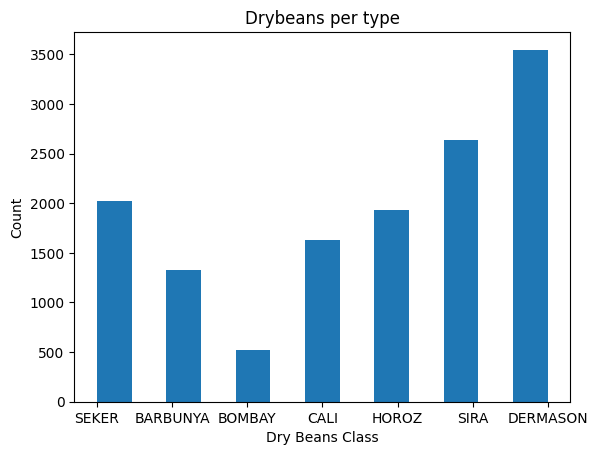

In [ ]:
# dependent variable histogram distribution
plt.hist(dfd['Class'], bins=13)
plt.xlabel('Dry Beans Class')
plt.ylabel('Count')
plt.title('Drybeans per type')
plt.show()

###Insights from the data exploration
of the data that we pulled from the UCI website:
- Shape of data : 13611X17
- All the columns are numerical
- There are no null values
- We have 68 duplicated rows
- classes (Response variable) - we have 7 classes

Action Items:
- To drop the duplicated rows
- Set aside 20% of the data for testing which we will not use in model building

## Removing the duplicates

In [ ]:
dfd.drop_duplicates(inplace=True)

## Data split - test & (model building - train, validation)


In [ ]:
#spliting the data to keep the test data set aside :
df,df_test = train_test_split(dfd, test_size = 0.2, shuffle = True)

df.reset_index(inplace=True)
df.drop(columns=["index"],inplace=True)
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   36060    715.300       267.026489       173.271399      1.541088   
1   91870   1286.118       439.644312       266.579312      1.649206   
2   54704    934.794       380.100103       184.613189      2.058900   
3  183153   1627.014       608.643469       385.110889      1.580437   
4   37968    709.268       252.149800       191.899925      1.313965   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.760880       36489     214.273232  0.683524  0.988243   0.885644   
1      0.795196       93731     342.012451  0.700229  0.980145   0.697946   
2      0.874128       55427     263.915320  0.729649  0.986956   0.786678   
3      0.774367      185326     482.905418  0.768578  0.988275   0.869443   
4      0.648687       38292     219.868959  0.785307  0.991539   0.948433   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.802442      0.007405      0.001894      0.643913      0.992327   
1     0.777930      0.004786      0.001081      0.605175      0.998058   
2     0.694331      0.006948      0.000996      0.482096      0.992587   
3     0.793413      0.003323      0.000812      0.629504      0.994891   
4     0.871978      0.006641      0.002368      0.760345      0.999067   

      Class  
0  DERMASON  
1  BARBUNYA  
2     HOROZ  
3    BOMBAY  
4     SEKER

#Data Exploration for model building (df)

## Spliting the data to X,y  & exploration

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
#shape of X
print('Data shape:',X.shape)

#data description of X
df_table = pd.DataFrame({'Nulls': X.isna().sum(), 'Dtype': X.dtypes,"Unique" : X.nunique(),'Duplicated' : X.duplicated().sum(),
                         'Mean': X.mean().round(3), 'Median':X.median().round(3), 'Skewness': X.skew()})
df_table

Data shape: (10834, 16)


Nulls    Dtype  Unique  Duplicated       Mean     Median  \
Area                 0    int64    9810           0  52717.696  44495.000   
Perimeter            0  float64   10752           0    852.893    792.644   
MajorAxisLength      0  float64   10834           0    319.070    295.788   
MinorAxisLength      0  float64   10834           0    201.910    192.368   
AspectRation         0  float64   10834           0      1.581      1.549   
Eccentricity         0  float64   10834           0      0.750      0.764   
ConvexArea           0    int64    9849           0  53431.557  45020.500   
EquivDiameter        0  float64    9810           0    252.424    238.018   
Extent               0  float64   10828           0      0.749      0.759   
Solidity             0  float64   10826           0      0.987      0.988   
roundness            0  float64   10834           0      0.874      0.884   
Compactness          0  float64   10834           0      0.800      0.802   
ShapeFactor1         0  float64   10834           0      0.007      0.007   
ShapeFactor2         0  float64   10834           0      0.002      0.002   
ShapeFactor3         0  float64   10834           0      0.645      0.643   
ShapeFactor4         0  float64   10834           0      0.995      0.996   

                 Skewness  
Area             2.955063  
Perimeter        1.617928  
MajorAxisLength  1.349212  
MinorAxisLength  2.234384  
AspectRation     0.588112  
Eccentricity    -1.086731  
ConvexArea       2.942948  
EquivDiameter    1.942247  
Extent          -0.897931  
Solidity        -2.544717  
roundness       -0.647671  
Compactness      0.038712  
ShapeFactor1    -0.530097  
ShapeFactor2     0.297770  
ShapeFactor3     0.246997  
ShapeFactor4    -2.752685

['SIRA' 'SEKER' 'DERMASON' 'BARBUNYA' 'HOROZ' 'CALI' 'BOMBAY']

 No of records in each class: 
 DERMASON    2832
SIRA        2147
SEKER       1618
HOROZ       1478
CALI        1301
BARBUNYA    1039
BOMBAY       419
Name: Class, dtype: int64




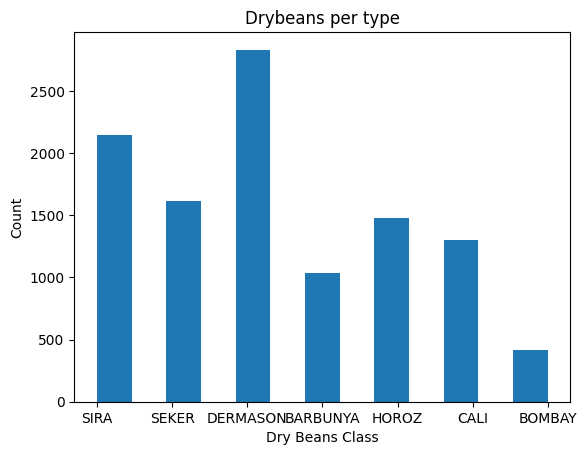

In [ ]:
# Analysis of y:
print(y.unique())

#count unique of :
print('\n No of records in each class: \n',y.value_counts())
print('\n')
# dependent variable histogram distribution
plt.hist(y, bins=13)
plt.xlabel('Dry Beans Class')
plt.ylabel('Count')
plt.title('Drybeans per type')
plt.show()

In [ ]:
#converting y to numeircal values for ease of analysis
y_dict = {'SIRA':0, 'SEKER':1,'DERMASON':2, 'BARBUNYA':3,'HOROZ':4, 'CALI':5, 'BOMBAY':6}
y_num = y.replace(y_dict)

y_num

0        0
1        0
2        1
3        1
4        1
        ..
10829    5
10830    4
10831    4
10832    1
10833    2
Name: Class, Length: 10834, dtype: int64

# Univariate Analysis
- Analysing each of the variables independently
- Will check each variables distribution
- Each variable w.r.t class

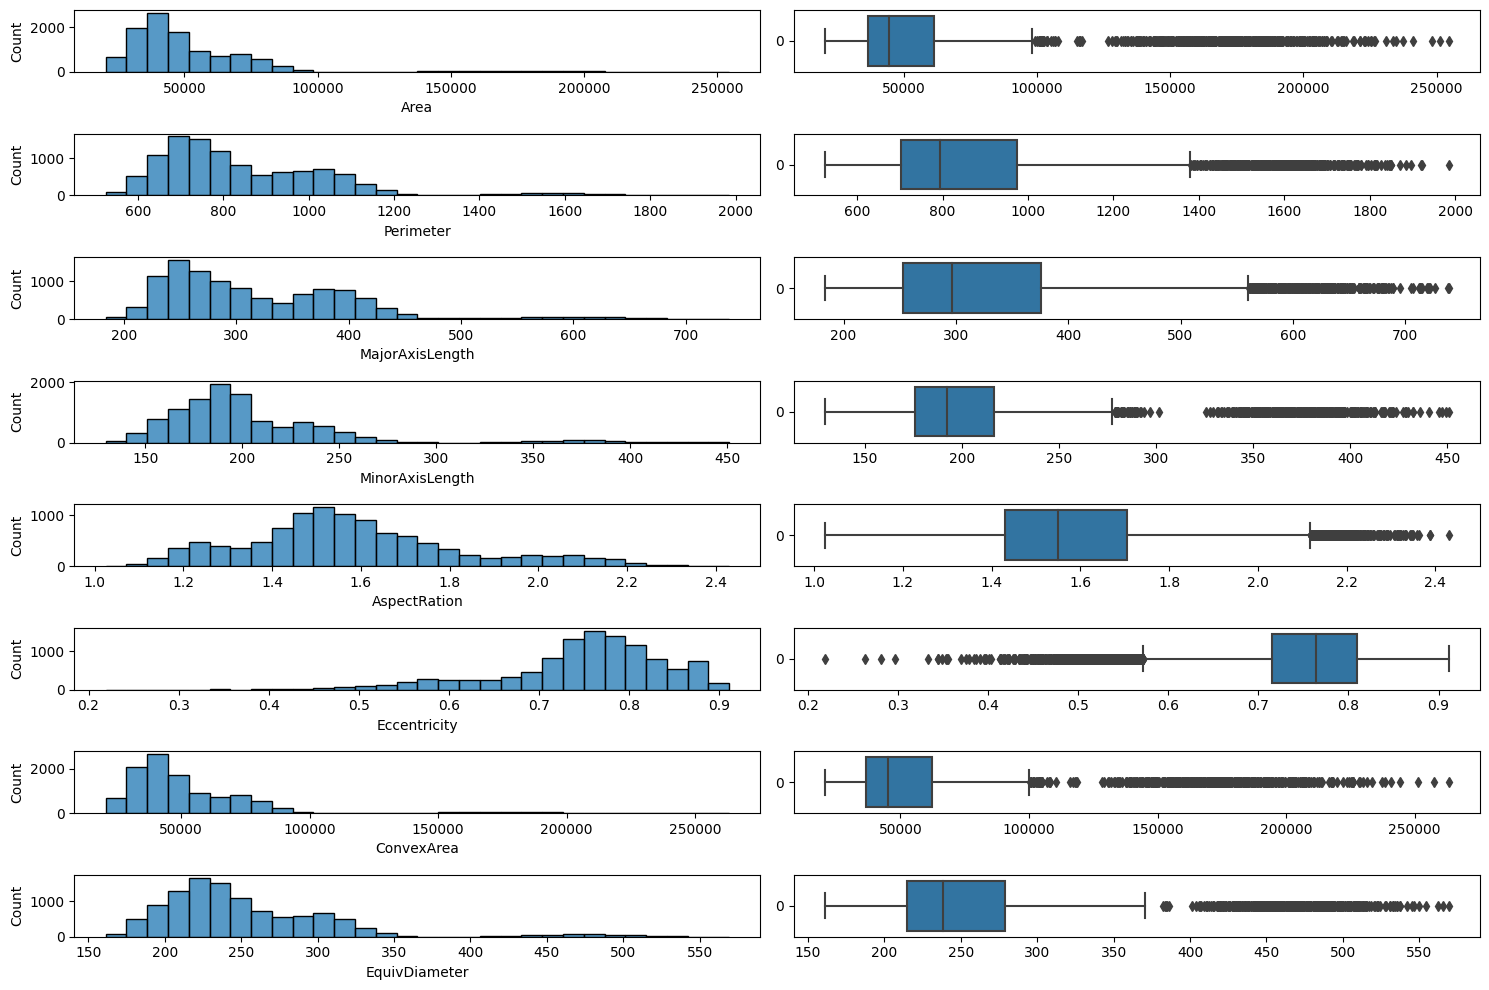

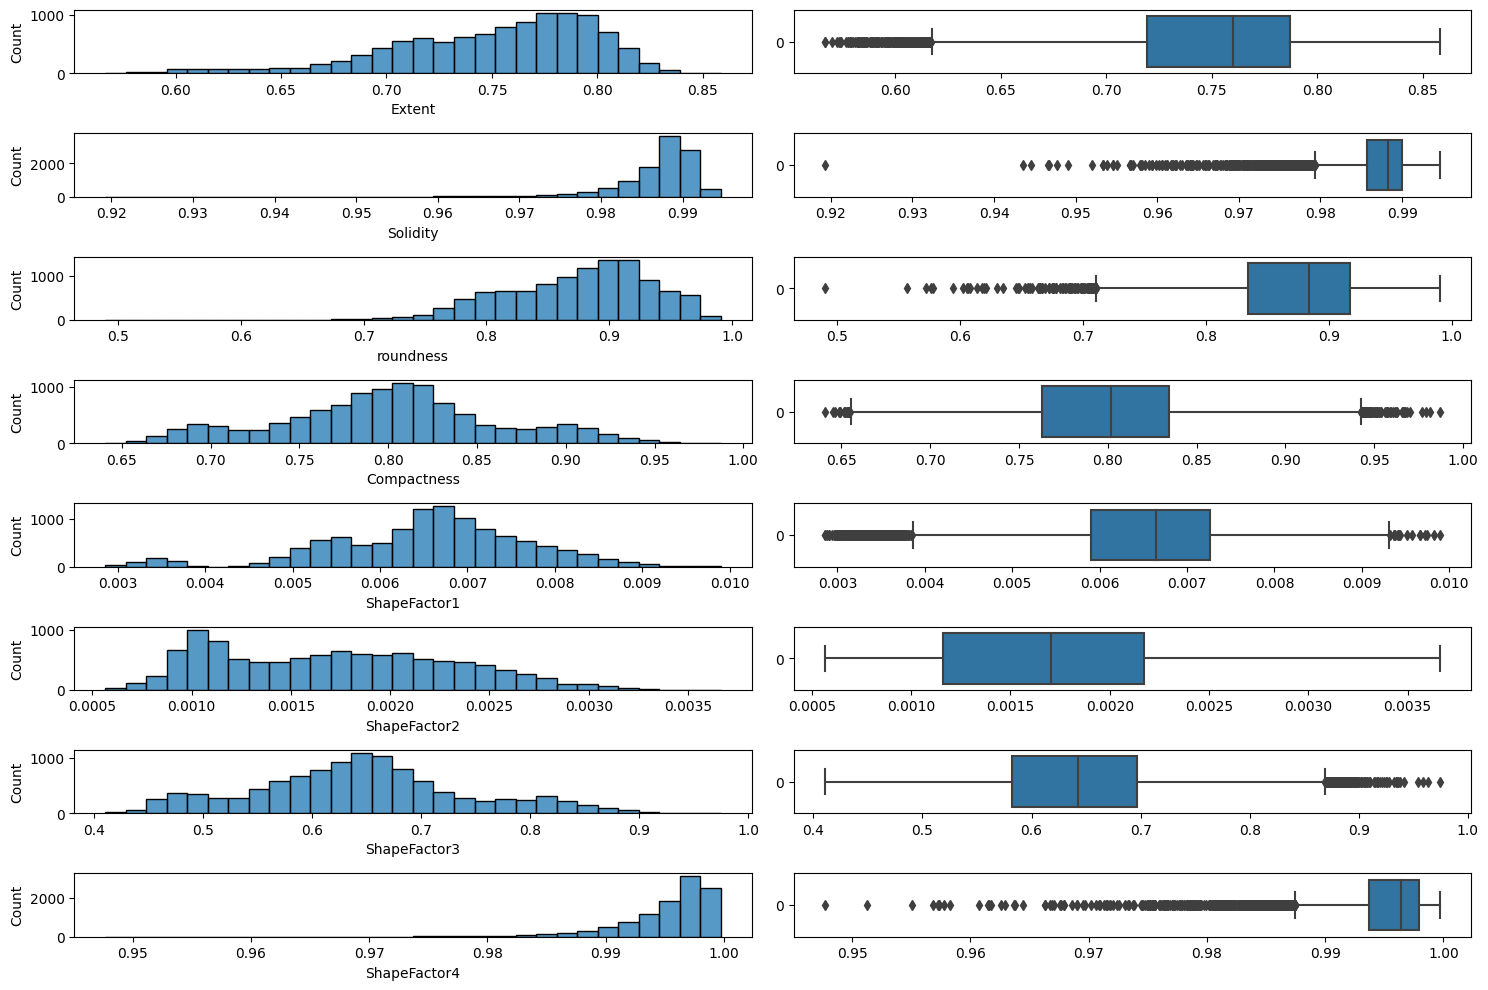

In [ ]:
#splititng attributes for ease of plots

col1 = (['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter'])

col2 = ['Extent','Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

#plot the first 8 variables
fig, axs = plt.subplots(len(col1), 2,figsize=(15, 10))

for i, var in enumerate(col1):
    sns.histplot(X[var], bins=30, edgecolor='black', ax=axs[i][0])
    sns.boxplot(X[var],orient="h", ax=axs[i][1])

plt.tight_layout()
plt.show()

print('\n')

#plotting the last 8 variables
fig, axs = plt.subplots(len(col2), 2,figsize=(15, 10))

for i, var in enumerate(col2):
    sns.histplot(X[var], bins=30, edgecolor='black', ax=axs[i][0])
    sns.boxplot(X[var],orient="h", ax=axs[i][1])

plt.tight_layout()
plt.show()

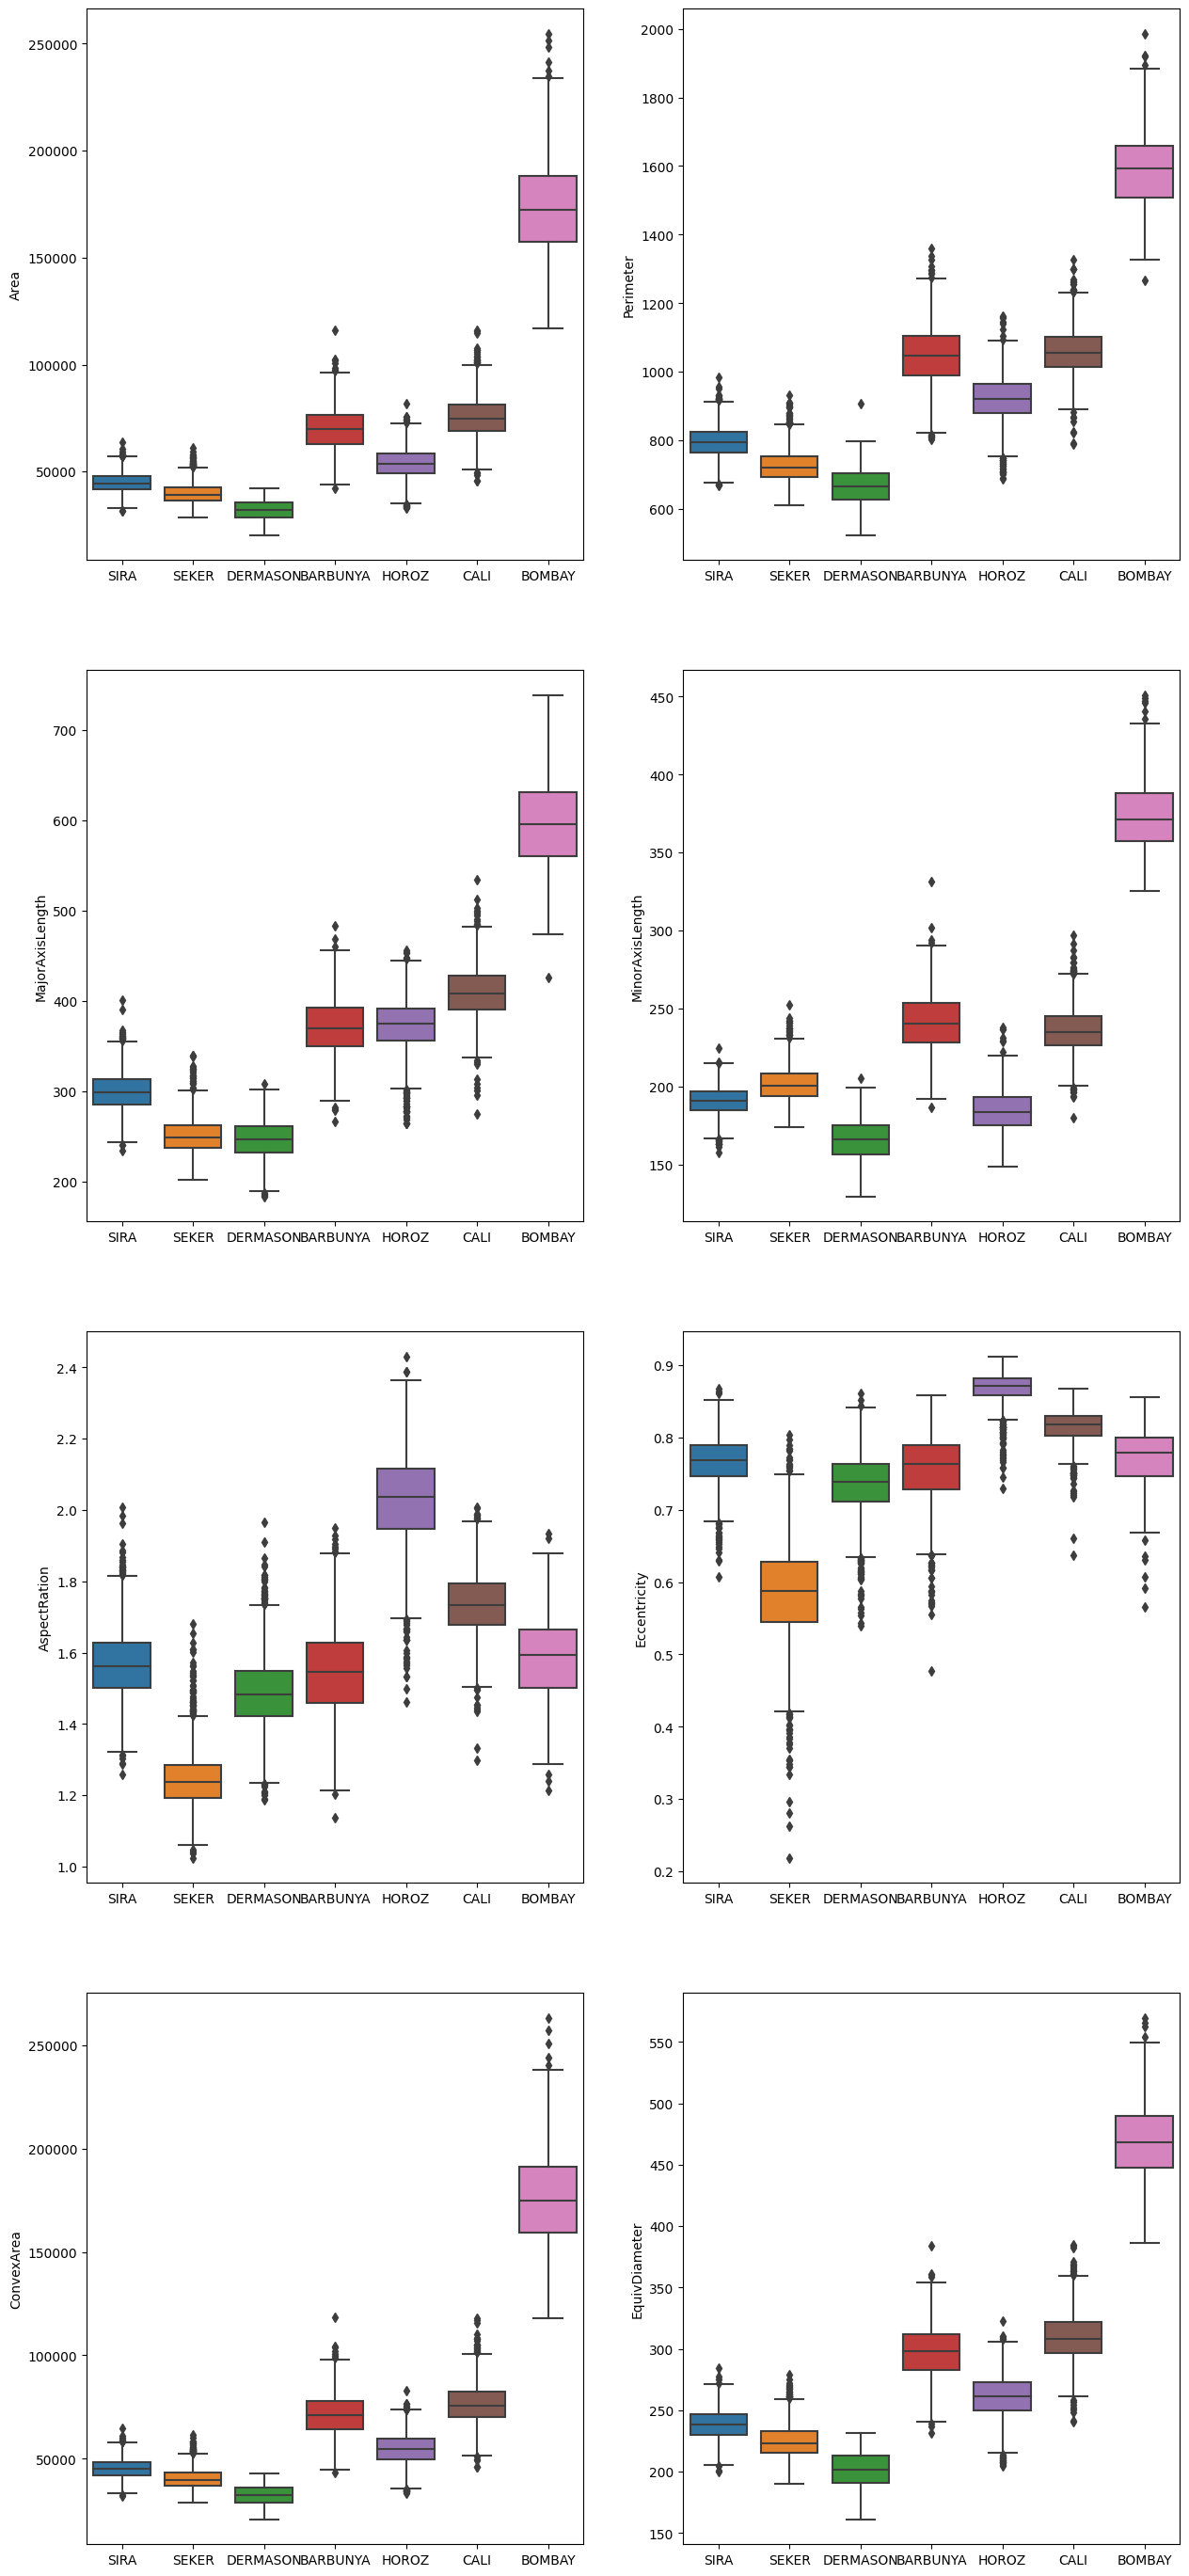

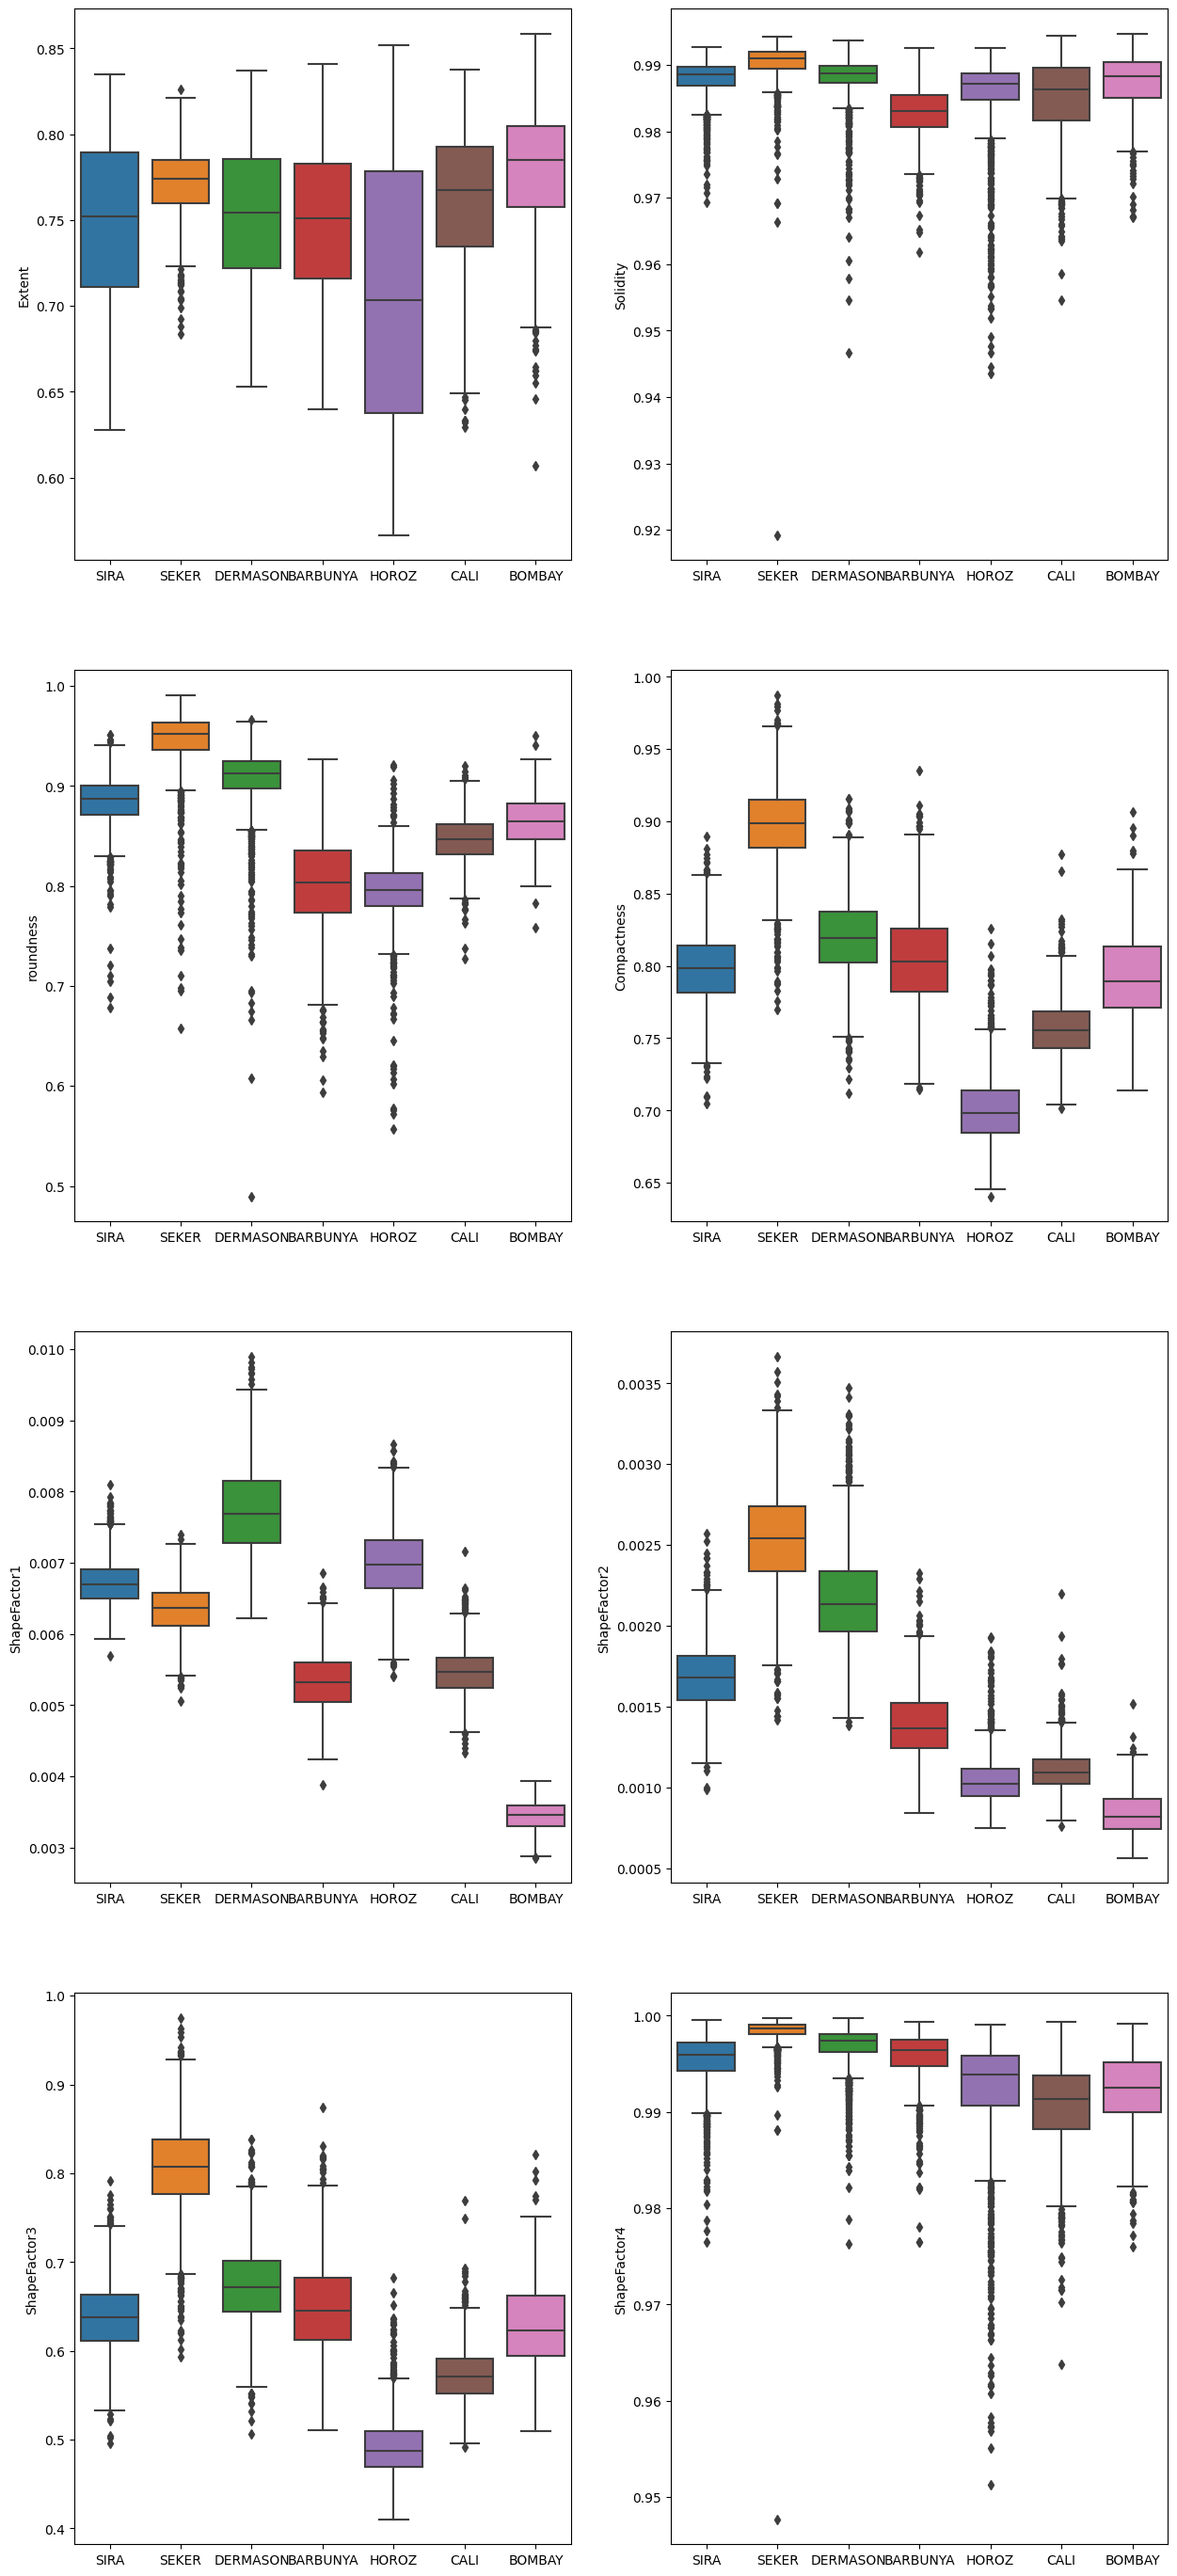

In [ ]:
# plotting w.r.t class to check the distributions & ouliers in each

#first 8 variables
fig, axes = plt.subplots(4, 2, figsize = (15, 35))
for col, ax in zip(X.iloc[:,0:8], axes.flatten()):
    sns.boxplot(data=X,
                   x=y,
                   y=col,
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

print('\n')

#last 8 variables
fig, axes = plt.subplots(4, 2, figsize = (15, 35))
for col, ax in zip(X.iloc[:,8:], axes.flatten()):
    sns.boxplot(data=df,
                   x=y,
                   y=col,
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

###Insights from Univariate:

- Most of the features are left or right skewed and have a lot of outliers(long tail in eccentricity, solidity, roundness, shape factor2, shape factor4)
- W.r.t area related features (Area, perimeter, convex area, equvidistance, major axis), we can differentiate the 'Bombay' class
- And group ['Sira','Seker','Dermason] & ['BARBUNYA' 'HOROZ' 'CALI'] & ['Bombay'] can be seperated
- We can see there could be an overlap in between the classes of the first 2 groups  
-  Both Barbunya class and Cali class have similar distributions and values in many features (area, minor axis length, equivalent diameter, extent, shape factor1), which may lead to mislabeling one as the other.

- Dermason class is similar to Seker class in some features, and Sira class in other features. It may be a difficult class to label accurately!

# Multivariate Analysis

<Axes: >

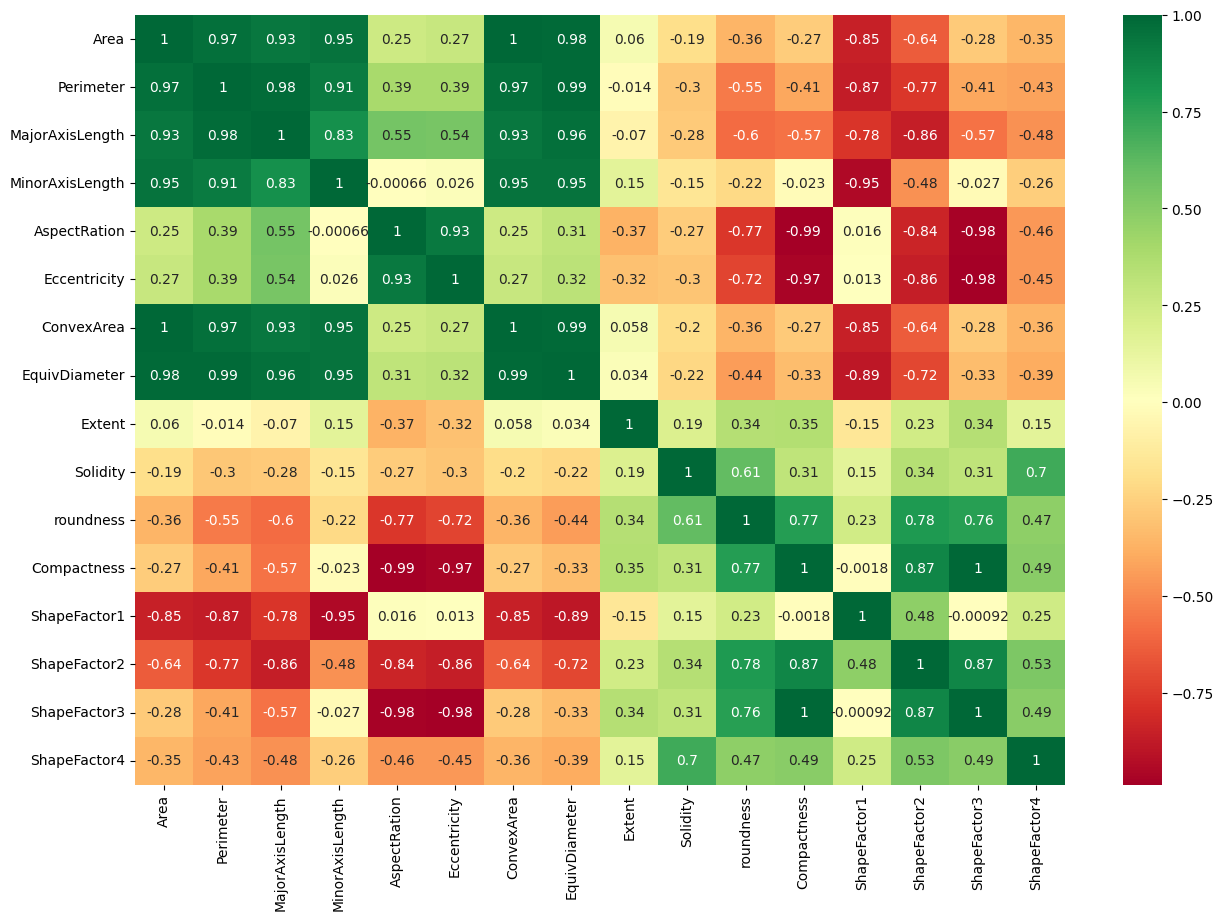

In [ ]:
#correlation analysis:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True, cmap = 'RdYlGn')

In [ ]:
#finding the coliumns to drop with high correlation
up_tr = pd.DataFrame(np.triu(X.corr(),1), columns=(X.columns))
to_drop = [column for column in up_tr.columns if any( (up_tr[column] > 0.95) & (up_tr[column] <1) )]
to_drop
print("\n columns we are dropping since there is >.95 correlation : \n", to_drop)


 columns we are dropping since there is >.95 correlation : 
 ['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor3']


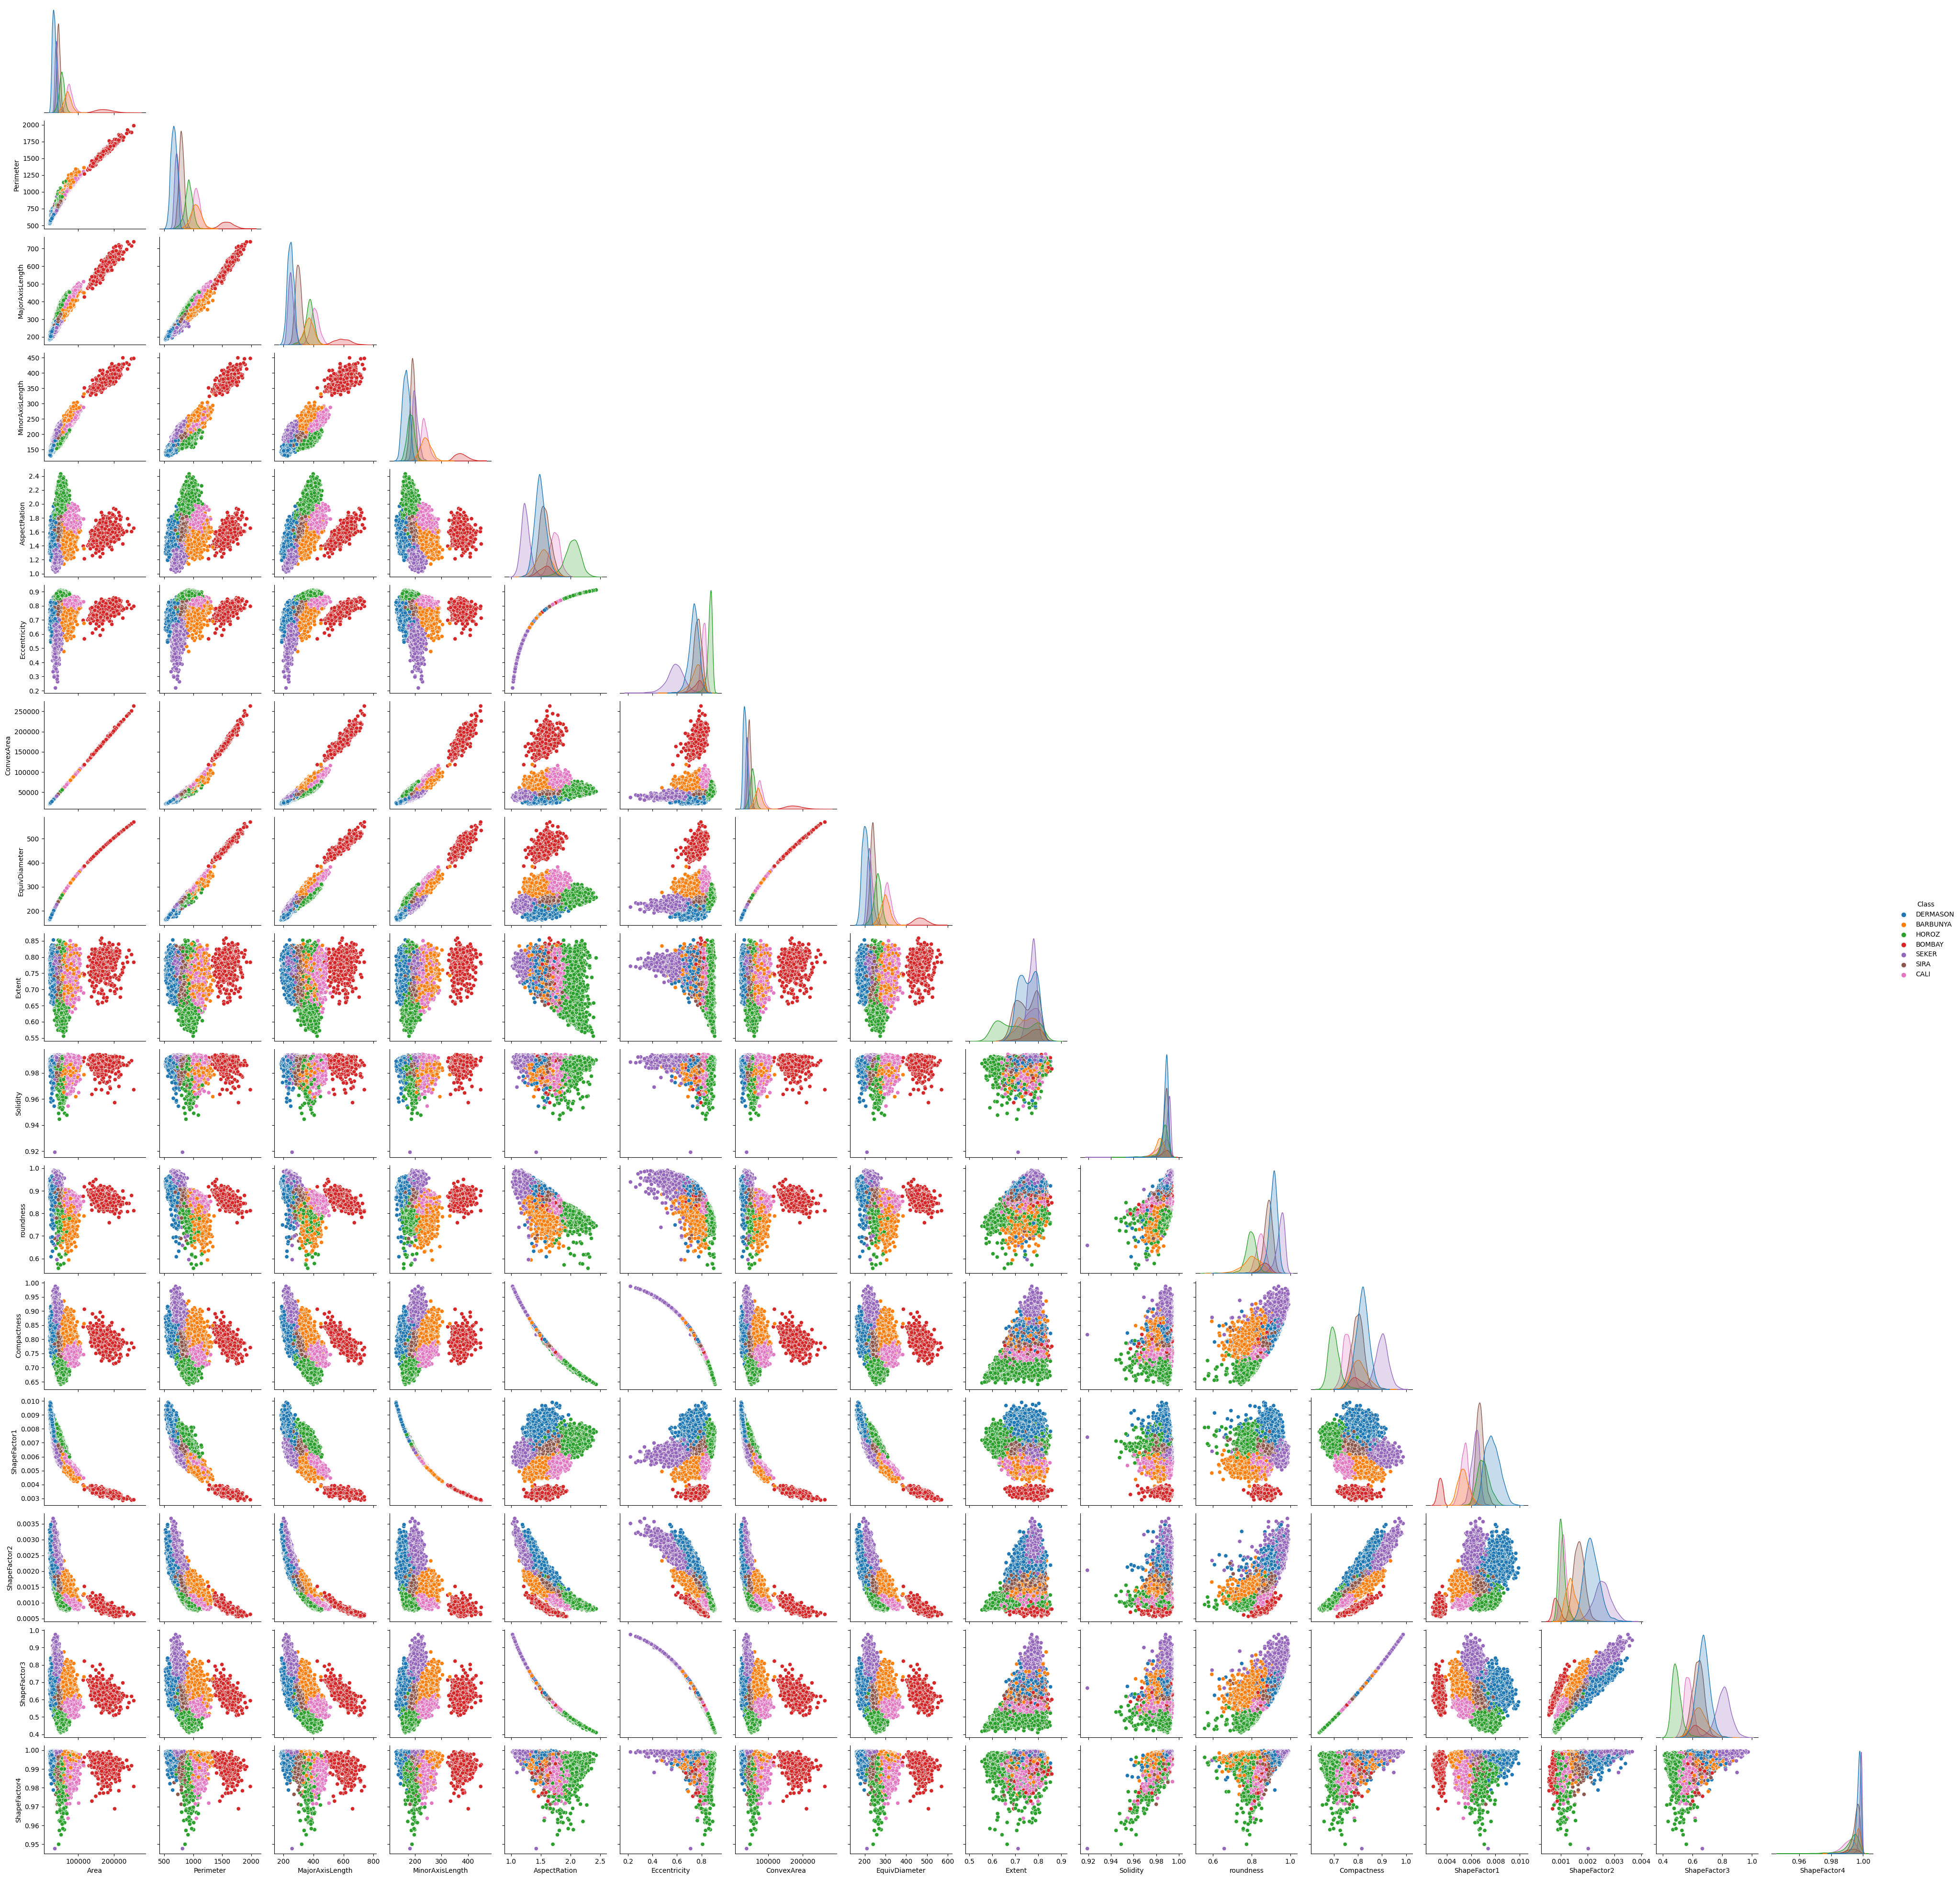

In [ ]:
#pairplots:
sns.pairplot(df,corner=True, hue='Class')

<BarContainer object of 16 artists>

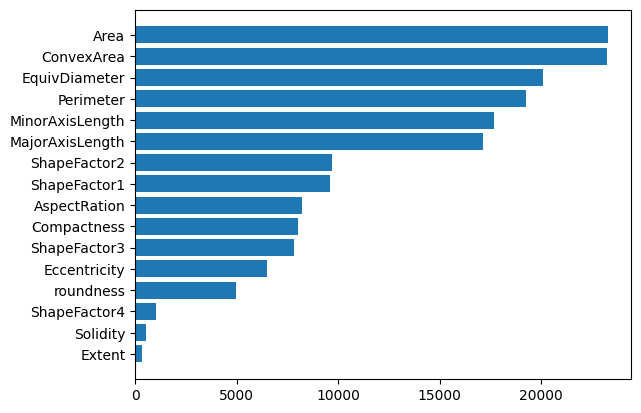

In [ ]:
# Anova/F-test to see the dependency of the variables w.r.t targe tvariable:
def select_feature_f(X_train, y_train):

    Sb = SelectKBest(score_func = f_classif, k = 'all')
    Sb.fit(X_train,y_train)
    X_train = Sb.transform(X_train)
    return X_train, Sb


X_train_selected_f, fs_f = select_feature_f(X,y)

selected_features_df = pd.DataFrame({'features': list(X.columns),
                                    'Scores': fs_f.scores_})

selected_features_df = selected_features_df.sort_values(by='Scores', ascending= True)

plt.barh(selected_features_df['features'],selected_features_df['Scores'])




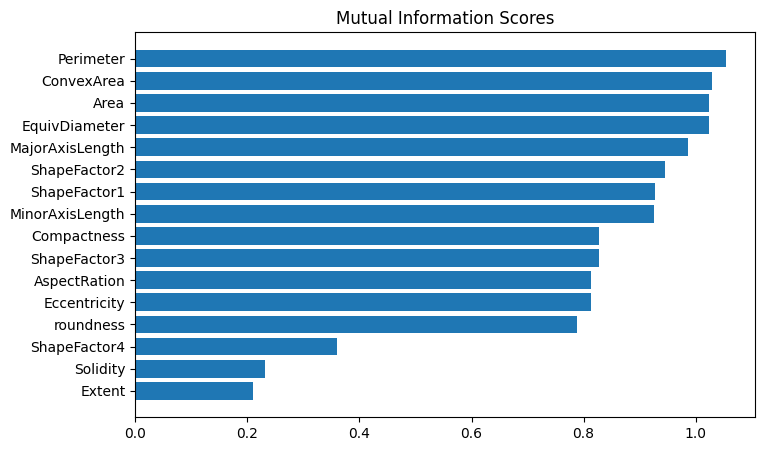

In [ ]:
#mutual informationscores:

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# Label encoding for categoricals
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = df.dtypes == int

mi_scores = make_mi_scores(df.drop(columns=['Class']), df['Class'], discrete_features=False)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
# Checking the coloums to drop
#finding the coliumns to drop with high correlation
up_tr = pd.DataFrame(np.triu(X.corr(),1), columns=(X.columns))
to_drop = [column for column in up_tr.columns if any( ((up_tr[column] >= 0.95) )  & (up_tr[column] <1) )]
to_drop
print("\n columns we are dropping since there is >= .95 correlation : \n", to_drop)


#finding the coliumns to drop with high correlation
up_tr = pd.DataFrame(np.triu(X.corr(),1), columns=(X.columns))
to_drop1 = [column for column in up_tr.columns if any( (up_tr[column] < -0.95)   & (up_tr[column] <1) )]
to_drop1
print("\n columns we are dropping since there is =< -0.95 correlation : \n", to_drop)


 columns we are dropping since there is >= .95 correlation : 
 ['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor3']

 columns we are dropping since there is =< -0.95 correlation : 
 ['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor3']


## Insights from multivariate:
- For correlation plots following pairs have highest correlation with each other:
 - area & convex area : 1.00
 - compactness & shape factor 3 : 1.00
  - equivalent diameter & perimeter: 0.99
  - equivalent diameter & convex area: 0.99
  - major axis length & perimeter: 0.98
 - area & perimeter: 0.97
  - convex area & perimeter : 0.97
  - major axis length & equivalent diameter : 0.96
 -  minor axis length & equivalent diameter : 0.95
  - minor axis length & convex area : 0.95
 -  minor axis length & shape factor 1 : -0.95
  - eccentricity & compactness : -0.97
 -  eccentricity & shape factor 3 : -0.98
 - aspect ration & shape factor 3 : -0.98
  - aspect ration & compactness : -0.99

- From Mutual Information & F-test, we can see that follwoing variables have least dependency w.r.t to response variable:
 - ShapeFactor4
 - Solidity
 - Extent

we can conclude that, the above highly correlated features are not useful for our analysis and can be dropped.
Similarlly, features that offer very low information to the dependent variable can also be dropped.
- We are dropping -
['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor3','Compactness'] & ['Extent','Solidity','ShapeFactor4']

# Feature Engineering:
- Create new features
- Remove outliers from final_X (after feature selection)
- select features to use for model
- multiple X's for models

In [ ]:
X.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [ ]:
# new features generation:
# reason - following how SF1-4 are created, to reduce the variance, will use in one of the datasets
X_new = X.copy()
X_new['ShapeFactor5'] = X['MajorAxisLength'] / X['Perimeter']
X_new['ShapeFactor6'] = X['MinorAxisLength'] / X['Perimeter']
X_new['ShapeFactor7'] = X['Eccentricity'] * X['Area']
X_new['ShapeFactor8'] = X['Eccentricity'] * X['Perimeter']
X_new['ShapeFactor9'] = X['Extent'] * X['Area']
X_new['ShapeFactor10'] = X['Extent'] * X['Perimeter']

In [ ]:
#remove_outliers
def removeOutliers(df,outliersColomns):
    z_scores = stats.zscore(df[outliersColomns])
    abs_z_scores = np. abs(z_scores)
    filtered_entries = (abs_z_scores < 3). all(axis=1)
    new_df = df[filtered_entries]
    return new_df

In [ ]:
X_col = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6',
       'ShapeFactor7', 'ShapeFactor8', 'ShapeFactor9', 'ShapeFactor10']

In [ ]:
#removing outliers in X after Feature Engineering
X_new = removeOutliers(X_new,X_col)
X_new.shape

(9947, 22)

In [ ]:
#removing outliers in y after Feature Engineering
index_value = (X_new.reset_index())['index']
y_new = y[index_value]
y_new

0        0
1        1
2        2
4        4
5        5
        ..
10829    4
10830    1
10831    0
10832    0
10833    4
Name: Class, Length: 9947, dtype: int64

In [ ]:
# feature selection
# features to drop from our univariate, Bivariate analysis & MI analysis
columns_to_drop = ['Perimeter',
          'MajorAxisLength','MinorAxisLength',
          'ConvexArea','EquivDiameter',
          'ShapeFactor3','Compactness',
          'Extent','Solidity','ShapeFactor4']

X_new.drop(columns_to_drop, axis=1,inplace=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, test_size=0.25, random_state=42)

In [ ]:
#standardizing the data
def std_train(X):

  mean = np.mean(X)
  std = np.std(X)
  for columns in X.columns:
    X[columns] = (X[columns]-mean[columns])/std[columns]
  return X, mean, std

def std_test(X, mean, std):
    for columns in X.columns:
      X[columns] = (X[columns]-mean[columns])/std[columns]
    return X

In [ ]:
# standarding the test and train datasets:
X_train_std, mean, std = std_train(X_train)
X_val_std = std_test(X_val,mean,std)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<Axes: >

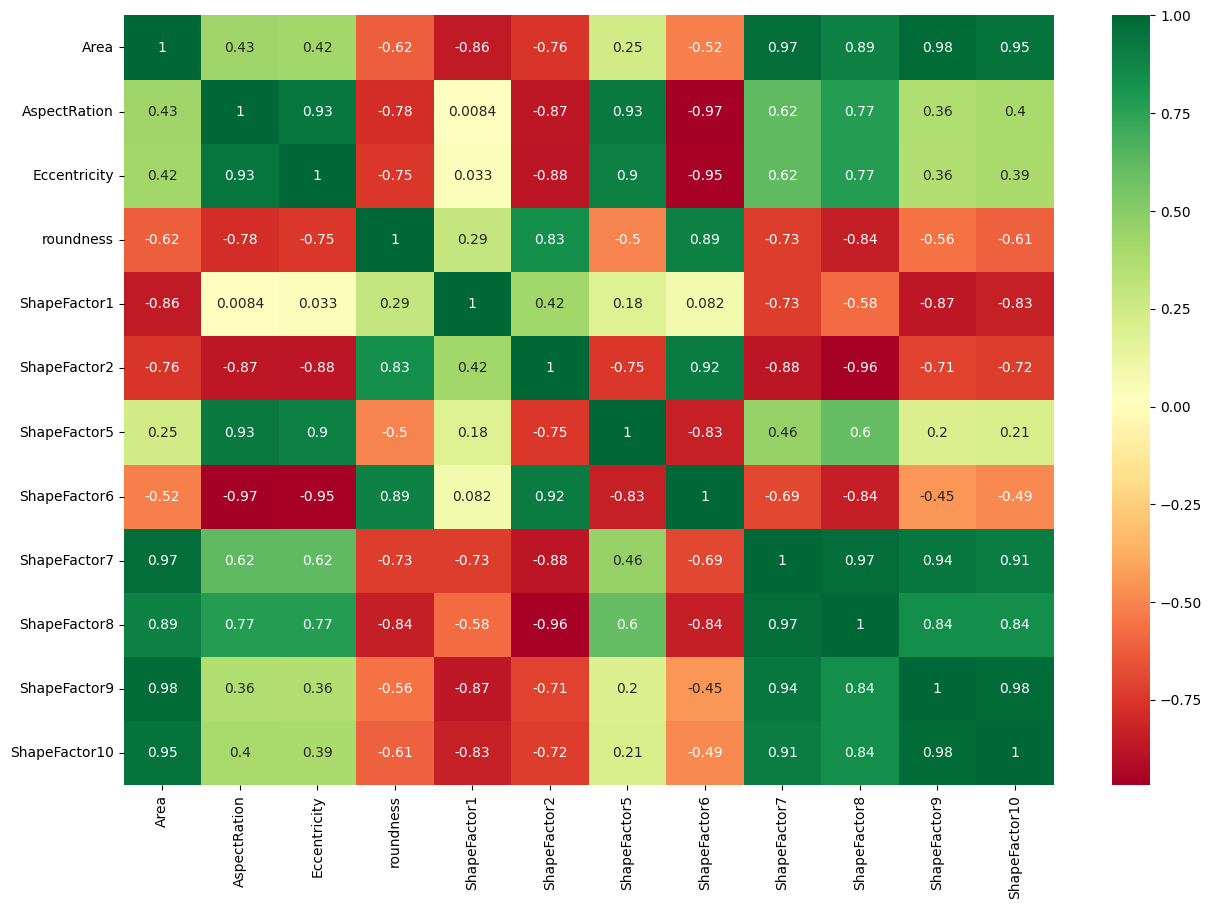

In [ ]:
#checking for correlation with new features
plt.figure(figsize=(15,10))
sns.heatmap(X_train_std.corr(),annot=True, cmap = 'RdYlGn')

## Feature Selections:

##PCA model

In [ ]:
import numpy as np

class PCA_SL:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        top = eigenvalues[0:self.n_components]
        variance_ratio = top.sum() / eigenvalues.sum()
        print(f"Variance captured: {variance_ratio:.2%}")
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)


## Dataset1

In [ ]:
#PCA hyperparameter tuning
pca = PCA()
logistic = LogisticRegression(max_iter=10000)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Define the grid of n_components to try
param_grid = {
    'pca__n_components': [1,2,3,4,5,6,7,8,9,10,11,12]
}

# Use GridSearchCV to tune the n_components parameter
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train_std, y_train)
n_comp = search.best_params_
# Print the best parameters and test score
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(n_comp)
print("Val score:", search.score(X_val_std, y_val))

# Print the variance captured by each principal component
pca.fit(X_train)
print("Variance captured by each principal component:", (pca.explained_variance_ratio_))


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameter (CV score=0.911):
{'pca__n_components': 11}
Val score: 0.9071170084439083
Variance captured by each principal component: [7.04987975e-01 2.40317900e-01 3.39149122e-02 8.56591731e-03
 6.79475892e-03 4.70914464e-03 5.34328358e-04 7.44879154e-05
 4.48915065e-05 3.06260462e-05 1.79278438e-05 7.13037293e-06]


In [ ]:
#set1
pca_sl = PCA_SL(9)
pca_sl.fit(X_train_std)

#dataset1 - PCA with feature engineered, standardized dataset(12 data)
X_train_pca = pca_sl.transform(X_train_std)
X_val_pca = pca_sl.transform(X_val_std)

Variance captured: 99.99%


##Dataset2

In [ ]:
# dataset2 - PCA with original datset, standardized and without dependent features

#dropping new features created
X_train_std2 = X_train_std.iloc[:,:6]
X_val_std2 = X_val_std.iloc[:,:6]

#PCA hyperparameter tuning
pca = PCA()
logistic = LogisticRegression(max_iter=10000)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Define the grid of n_components to try
param_grid = {
    'pca__n_components': [1,2,3,4,5,6]
}

# Use GridSearchCV to tune the n_components parameter
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train_std2, y_train)
n_comp = search.best_params_
# Print the best parameters and test score
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(n_comp)
print("Val score:", search.score(X_val_std2, y_val))

# Print the variance captured by each principal component
pca.fit(X_train)
print("Variance captured by each principal component:", (pca.explained_variance_ratio_))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameter (CV score=0.908):
{'pca__n_components': 6}
Val score: 0.9055086449537596
Variance captured by each principal component: [7.04987975e-01 2.40317900e-01 3.39149122e-02 8.56591731e-03
 6.79475892e-03 4.70914464e-03 5.34328358e-04 7.44879154e-05
 4.48915065e-05 3.06260462e-05 1.79278438e-05 7.13037293e-06]


In [ ]:
# pca on set 2
pca_sl = PCA_SL(5)
pca_sl.fit(X_train_std2)

# dataset2 - PCA with original datset, standardized and without dependent features
X_train_pca2 = pca_sl.transform(X_train_std2)
X_val_pca2 = pca_sl.transform(X_val_std2)

Variance captured: 99.94%


## Dataset3

In [ ]:
#Lasso for feature selection
# Define the hyperparameters to search over
param_grid = {'alpha': [0.005,0.003,0.001, 0.01,0.1, 1, 10, 100]}

# Create a Lasso regression model
lasso = Lasso()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5)
grid_search.fit(X_train_std, y_train)

# Print the best hyperparameters and the corresponding mean squared error on the test set
print(f"Best hyperparameters: {grid_search.best_params_}")
y_pred = grid_search.predict(X_val_std)
mse = mean_squared_error(y_val, y_pred)
print(f"Mean squared error: {mse:.2f}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.809e+02, tolerance: 3.077e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.023e+03, tolerance: 3.081e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.674e+02, tolerance: 3.083e+00

Best hyperparameters: {'alpha': 0.001}
Mean squared error: 2.47


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.894e+03, tolerance: 3.842e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#lasso model
clf = Lasso(alpha=0.001)
clf.fit(X_train_std, y_train)
coef = clf.coef_
coef

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.894e+03, tolerance: 3.842e+00
  model = cd_fast.enet_coordinate_descent(


array([-3.98924064, -4.6467439 ,  0.75999654, -6.42438324, -4.33187551,
        0.57585392,  8.42650271,  5.66597519,  5.08019117, -5.45067935,
        0.26901638, -0.1277832 ])

In [ ]:
#since the lasso didn't drop any feature, we will select the whole data set for our model

#Datasets:
# X_train_std
# X_train_pca
# X_train_pca2

#Model Selection reasons

# Model building

##Logistic Regression

In [ ]:
class logit:

    def __init__(self,X_train,y_train,X_test,y_test, reg,reg_param, learning_rate = 0.00001, tol = 0.00005, maxIter = 50000):

        self.X_train = X_train
        self.y_train = y_train
        self.X_test= X_test
        self.y_test = y_test
        self.learning_rate = learning_rate
        self.tol = tol
        self.maxIter = maxIter
        self.error = []
        self.iter_count = []
        self.reg = reg
        self.reg_param = reg_param
        #self.sgd = sgd

    def addBias(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])


    def softmax(self,z):
        z = z - np.max(z)
        z = np.exp(z)
        return np.divide(z , z.sum(axis=0))

    def costFunction(self,X,y):
        y_hat = self.softmax(X.dot(self.w)) # y_hat = predicted labels
        cost  = - np.sum(np.log(y_hat) * y) # - sum(  y * log ( y_hat )  )
        if self.reg:
          cost  = cost + (self.reg_param * ( np.sum(np.square(self.w)) ) )
        return 0.5* np.mean(cost)

    def gradient(self,X,y):
        #print(y)
        softmax = self.softmax(X.dot(self.w))
        grad_w = X.T.dot(softmax - y)
        #print(grad.shape)
        #grad_b = np.sum(softmax - y)
        return grad_w / X.shape[0]

    def gradientDescent(self,X,y):
        prev_error = float('inf')
        for i in tqdm(range(self.maxIter)):
            W  = self.gradient(X,y)
            if self.reg: # L2 regularisation
                w_update = self.w * (1 - self.learning_rate *( self.reg_param / X.shape[0]))
                self.w  = w_update - (self.learning_rate  * W)
            else:
                self.w = self.w - self.learning_rate * W
            curr = self.costFunction(X,y)
            self.error.append(curr)
            self.iter_count.append(i)
            diff = prev_error - curr
            prev_error= curr

            if abs(diff) < self.tol:
                print("stopped")
                break
        print("train error:", curr)
        #self.plot()

            #break
        #plot function


    #change
    def predict(self,X):
        pred = self.softmax(X.dot(self.w))
        return pred


    # change
    def evaluate(self,y,y_hat):
        #print(y.shape)
        #print(y_hat.shape)
        y = np.argmax(y, axis = 1)
        y_hat = np.argmax(y_hat, axis = 1)
        accuracy = np.mean(y==y_hat) #.sum() / y.size
        #precision = (y&y_hat).sum() / y_hat.sum()
        #recall = (y&y_hat).sum() / y.sum()

        return  accuracy


    def fit(self):
        # add an axis to y_train to make it a 2D array
        self.y_train = self.y_train

        # add bias to the input data
        X_train = self.addBias(self.X_train)
        X_test = self.addBias(self.X_test)

        # initialize weights with random values
        self.w = np.random.randn(X_train.shape[1], 1) * (2 / np.sqrt(X_train.shape[0]))

        # run gradient descent to optimize weights
        self.gradientDescent(X_train, self.y_train)

        # make predictions on test data
        y_hat = self.predict(X_test)

        # calculate prediction error
        accuracy = self.evaluate(self.y_test, y_hat)
        print(f"Test Accuracy: {accuracy:.4f}")

        # plot the learning curve
        self.plot()



    def plot(self, figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.iter_count,self.error)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()


In [ ]:
from tqdm import tqdm
lr_error = []
reg_cost = []
reg_param = [0.001,0.005,0.009,0.01,0.15,0.2 ]
learning_rate = [0.00025,0.0003,0.0005,0.0008,0.001,0.005 ]

for j in learning_rate:
    reg_logit = logit(X_train_std,(pd.Series.to_numpy(y_train)),X_val_std,pd.Series.to_numpy(y_val) ,reg = True,reg_param = 0.005,learning_rate = j, tol = 0.00005, maxIter = 10)
    reg_logit.fit()
    lr_error.append(np.mean(reg_logit.error))



plt.figure(figsize=(7,5))
plt.plot(learning_rate,lr_error)
plt.xlabel('learning rate')
plt.ylabel('Cost')
plt.title("learning rate vs Cost")
plt.show()

100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


train error: 685903389.9009571


AxisError: ignored

In [ ]:
type(X_train.shape[0])

int

In [ ]:
X_train_std.shape

# Performance Evaluation

- Loading data & libraries
- Split the test data and keep it aside for testing
- Split the test data into X and y
- ` change y to numerical `
- Data exploration, visual exploration
- Univariate
- multivariate & bivarite
- check for outliers -> should we remove the rows? yes (how ->
- Features selection - X values correlation, X,y values relation
- Feature engineering (to use linear seperable or other methods)
- Datasets preperation -> one with UV analysis (dropping features) | one with PCA on the whole data
- Model building (why these models are selected?)
- Comparision